In [3]:
!pip install numpy pandas matplotlib seaborn scikit-learn tensorflow keras opencv-python joblib

In [4]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from skimage.feature import hog
from sklearn.svm import SVC
import joblib
import win32com.client as wincl


In [5]:
# Define the path to the dataset
dataset_path = r'C:\Users\suray\Desktop\MyClassification\Indian_currency_notesall\train'
real_currency_path = r'C:\Users\suray\Desktop\Fake_Currency\Fake_Currency\data\real'
fake_currency_path = r'C:\Users\suray\Desktop\Fake_Currency\Fake_Currency\data\fake'

# Define the image size for resizing
img_size = 64


In [6]:
# Function to load and preprocess images
def load_data(dataset_path, img_size):
    images = []
    labels = []
    for label in os.listdir(dataset_path):
        if os.path.isdir(os.path.join(dataset_path, label)):
            for image_file in os.listdir(os.path.join(dataset_path, label)):
                img_path = os.path.join(dataset_path, label, image_file)
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (img_size, img_size))
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

# Load the data
images, labels = load_data(dataset_path, img_size)

# Normalize the images
images = images / 255.0

# Convert labels to categorical (one-hot encoding)
label_to_index = {label: index for index, label in enumerate(np.unique(labels))}
index_to_label = {index: label for label, index in label_to_index.items()}
labels = np.array([label_to_index[label] for label in labels])
labels = to_categorical(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [7]:
# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_to_index), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)


C:\Users\suray\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 684,103 (2.61 MB)

 Trainable params: 684,103 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.1598 - loss: 1.9741 - val_accuracy: 0.2336 - val_loss: 1.7188
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.2714 - loss: 1.7087 - val_accuracy: 0.5109 - val_loss: 1.3791
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.4330 - loss: 1.3851 - val_accuracy: 0.6135 - val_loss: 1.1099
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.5595 - loss: 1.1407 - val_accuracy: 0.6943 - val_loss: 0.9473
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.6367 - loss: 0.9704 - val_accuracy: 0.7293 - val_loss: 0.7542
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.6603 - loss: 0.8813 - val_accuracy: 0.6921 - val_loss: 0.7369
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.6804 - loss: 0.8947 - val_accuracy: 0.7838 - val_loss: 0.6120
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.7323 - loss: 0.7393 - val_accuracy: 0.7664 - v

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7887 - loss: 0.6289
Test accuracy: 0.7838428020477295


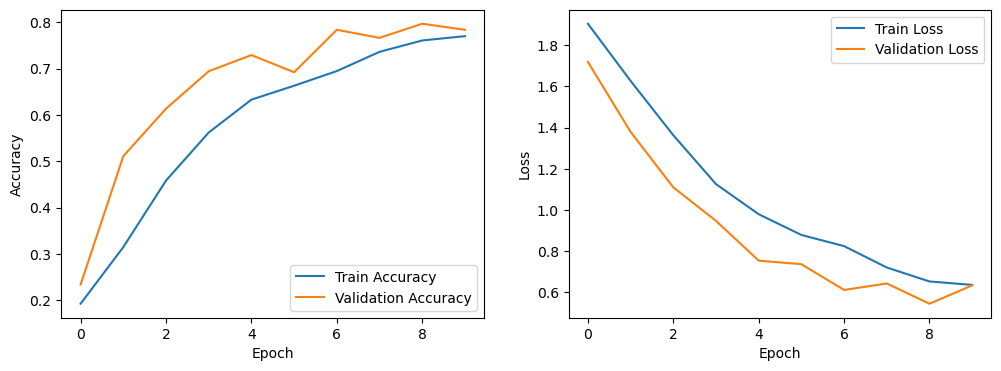

In [8]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
              precision    recall  f1-score   support

          10       0.67      0.91      0.77        69
         100       0.92      0.75      0.82        72
          20       0.68      0.60      0.64        53
         200       0.80      0.76      0.78        70
        2000       0.73      0.94      0.83        70
          50       1.00      0.84      0.91        61
         500       0.78      0.63      0.70        63

    accuracy                           0.78       458
   macro avg       0.80      0.78      0.78       458
weighted avg       0.80      0.78      0.78       458



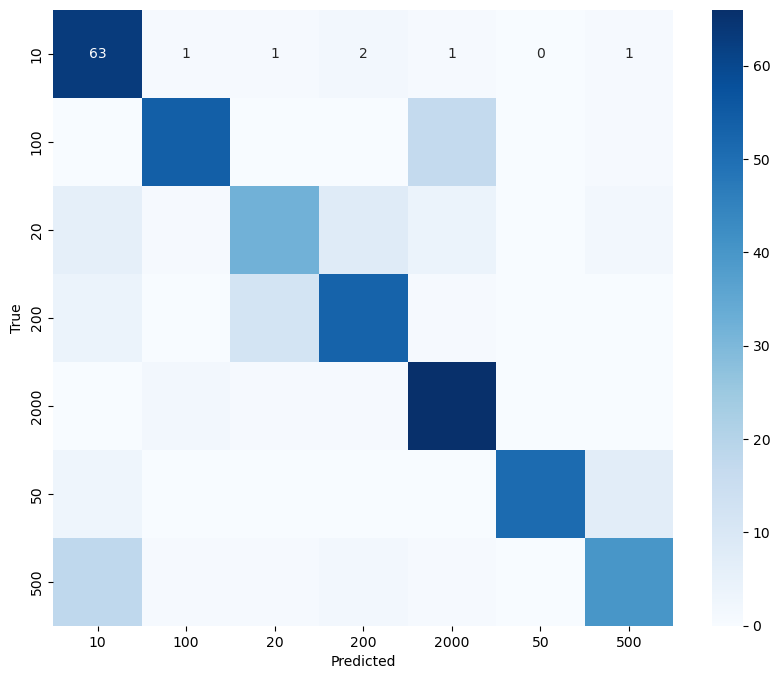

In [9]:
# Generate classification report and confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=list(label_to_index.keys())))

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(label_to_index.keys()), yticklabels=list(label_to_index.keys()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [10]:
# Function to load images from a folder for fake currency detection
from sklearn.svm import SVC
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    return images

# Load real and fake images
real_images = load_images_from_folder(real_currency_path)
fake_images = load_images_from_folder(fake_currency_path)

# Create labels
real_labels = [1] * len(real_images)
fake_labels = [0] * len(fake_images)

# Combine images and labels
images = real_images + fake_images
labels = real_labels + fake_labels

def preprocess_image(image_path, img_size):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_size, img_size))
    img = img / 255.0
    return img

def preprocess_image_svm(image, size=(128, 128)):
    resized_image = cv2.resize(image, size)
    return resized_image

# Preprocess all images for SVM
processed_images = [preprocess_image_svm(img) for img in images]

def extract_features(image):
    # Extract HOG features
    features = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
    return features

# Extract features for all images
features = [extract_features(img) for img in processed_images]

# Split the dataset into training and testing sets
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(features, labels, test_size=0.3, random_state=42)

# Train an SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_svm, y_train_svm)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test_svm)

# Evaluate accuracy
accuracy = accuracy_score(y_test_svm, y_pred_svm)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Save the SVM model
joblib.dump(svm_model, 'currency_detector_model.pkl')

Model Accuracy: 87.05%


['currency_detector_model.pkl']

In [18]:
def classify_currency(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    processed_image = preprocess_image_svm(image)
    features = extract_features(processed_image)
    prediction = svm_model.predict([features])
    return 'Fake' if prediction[0] == 0 else 'Real'

def speak(text):
    speaker = wincl.Dispatch("SAPI.SpVoice")
    speaker.Speak(text)

def combined_classification(image_path):
    # Classify the denomination of the currency
    currency_img = preprocess_image(image_path, img_size)
    predicted_probabilities = model.predict(np.expand_dims(currency_img, axis=0))
    predicted_class_index = np.argmax(predicted_probabilities)
    predicted_class_label = index_to_label[predicted_class_index]

    # Check if the currency is real or fake
    result = classify_currency(image_path)

    # Generate output text
    output_text = f'The Currency class label is : {predicted_class_label} and the Currency note is {result} .'

    # Print and speak the result
    print(output_text)
    speak(output_text)

image_path = r'C:\Users\suray\Desktop\MyClassification\Indian_currency_notesall\train\20\20 (92).jpg'
combined_classification(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
The Currency class label is : 20 and the Currency note is Fake .


In [ ]:
# Note : Code doesn't work properly when image is too dark or when image is not propely taken 